**Objective:** Finding out the which variables are significant in predicting the price of a car and how well those variables describe the price of a car.

#**1. Importing Libraries**

In [1]:
import numpy as np                                                           #for working with arrays
import pandas as pd                                                          #for data manipulation and analysis
import matplotlib.pyplot as plt                                              #for interactive visualisation
import seaborn as sns                                                        #data visualisation and EDA
from sklearn.preprocessing import LabelEncoder                               #to encode labels with value between 0 and n_classes-1
from sklearn.model_selection import train_test_split                         #for splitting dataset into 2 subsets ( train and test)
from sklearn.preprocessing import StandardScaler                             #to Standardize features by removing the mean and scaling to unit variance
import statsmodels.api as sm                                                 #for conducting statistical tests
from sklearn.feature_selection import RFE                                    #for feature rankling with recursive feature elimination
from sklearn.linear_model import LinearRegression                            #for regression analysis
from statsmodels.stats.outliers_influence import variance_inflation_factor   #to measure colinearity among predictor variables within a multiple regression
from sklearn.metrics import r2_score                                         #for calculating coefficient of determination
import warnings
warnings.filterwarnings("ignore")

#**2. Importing Dataset**

In [2]:
car = pd.read_csv("C:/Users/Sutanuka Ghosh/Downloads/CarPrice_Assignment.csv")

In [3]:
car.head()

car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \
0        mpfi       3.47    2.68              9.0        111     5000      21   
1        mpfi       3.47    2.68              9.0        111     5000      21   
2        mpfi       2.68    3.47              9.0        154     5000      19   
3        mpfi       3.19    3.40             10.0        102     5500      24   
4        mpfi       3.19    3.40              8.0        115     5500      18   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0  
2          26  16500.0  
3          30  13950.0  
4          22  17450.0  

[5 rows x 26 columns]

* **Here Price is target variable and and all other variables are independent variables**

#**3. Understanding Dataset**

In [4]:
car.shape

(205, 26)

* **Dataset has 205 rows and 26 columns**

In [5]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

* **Dataset has 8 interger, 10 object and 8 flot datatypes columns**

In [6]:
car.describe()

car_ID   symboling   wheelbase   carlength    carwidth   carheight  \
count  205.000000  205.000000  205.000000  205.000000  205.000000  205.000000   
mean   103.000000    0.834146   98.756585  174.049268   65.907805   53.724878   
std     59.322565    1.245307    6.021776   12.337289    2.145204    2.443522   
min      1.000000   -2.000000   86.600000  141.100000   60.300000   47.800000   
25%     52.000000    0.000000   94.500000  166.300000   64.100000   52.000000   
50%    103.000000    1.000000   97.000000  173.200000   65.500000   54.100000   
75%    154.000000    2.000000  102.400000  183.100000   66.900000   55.500000   
max    205.000000    3.000000  120.900000  208.100000   72.300000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   205.000000  205.000000  205.000000  205.000000        205.000000   
mean   2555.565854  126.907317    3.329756    3.255415         10.142537   
std     520.680204   41.642693    0.270844    0.313597          3.972040   
min    1488.000000   61.000000    2.540000    2.070000          7.000000   
25%    2145.000000   97.000000    3.150000    3.110000          8.600000   
50%    2414.000000  120.000000    3.310000    3.290000          9.000000   
75%    2935.000000  141.000000    3.580000    3.410000          9.400000   
max    4066.000000  326.000000    3.940000    4.170000         23.000000   

       horsepower      peakrpm     citympg  highwaympg         price  
count  205.000000   205.000000  205.000000  205.000000    205.000000  
mean   104.117073  5125.121951   25.219512   30.751220  13276.710571  
std     39.544167   476.985643    6.542142    6.886443   7988.852332  
min     48.000000  4150.000000   13.000000   16.000000   5118.000000  
25%     70.000000  4800.000000   19.000000   25.000000   7788.000000  
50%     95.000000  5200.000000   24.000000   30.000000  10295.000000  
75%    116.000000  5500.000000   30.000000   34.000000  16503.000000  
max    288.000000  6600.000000   49.000000   54.000000  45400.000000

* **Here we get to know about total count, mean,standard deviation, percentiles, minimum and maximum value of columns with numeric datatype**

####**Checking for missing values**

In [7]:
car.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

* **Dataset has no missing values**

#**3. Data Cleaning**

**a. Droping car_ID column since it is not significant feature in predicting price**

In [8]:
car= car.drop('car_ID',axis=1)

**b. Extracting Car Company from the CarName and renaming CarName column as CompanyNmae** 

In [9]:
car['CarName'] = car['CarName'].str.split(' ',expand=True)[0]

In [10]:
car.rename(columns={'CarName':'CompanyName'},inplace=True)

In [11]:
car['CompanyName'].value_counts()

toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
volkswagen      9
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
isuzu           4
porsche         4
alfa-romero     3
chevrolet       3
jaguar          3
vw              2
maxda           2
renault         2
toyouta         1
vokswagen       1
Nissan          1
mercury         1
porcshce        1
Name: CompanyName, dtype: int64

**Here we can find some spelling mistakes in company name which needs to be corrected**
* maxda = mazda
* Nissan = nissan
* porsche = porcshce
* toyota = toyouta
* vokswagen = volkswagen = vw

In [12]:
car['CompanyName'] = car['CompanyName'].replace({'maxda': 'mazda', 'nissan': 'Nissan', 'porcshce': 'porsche', 'toyouta': 'toyota', 
                            'vokswagen': 'volkswagen', 'vw': 'volkswagen'})

In [13]:
car['CompanyName'].value_counts()

toyota         32
Nissan         18
mazda          17
mitsubishi     13
honda          13
volkswagen     12
subaru         12
peugeot        11
volvo          11
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
jaguar          3
chevrolet       3
alfa-romero     3
renault         2
mercury         1
Name: CompanyName, dtype: int64

**c. Checking for duplicates**

In [14]:
car[car.duplicated()]

Empty DataFrame
Columns: [symboling, CompanyName, fueltype, aspiration, doornumber, carbody, drivewheel, enginelocation, wheelbase, carlength, carwidth, carheight, curbweight, enginetype, cylindernumber, enginesize, fuelsystem, boreratio, stroke, compressionratio, horsepower, peakrpm, citympg, highwaympg, price]
Index: []

[0 rows x 25 columns]

* **Dataset has no duplicates**

**d. Segregating numerical and categorical columns for ease of further analysis**

In [15]:
cat_col = car.select_dtypes(include=['object']).columns
num_col = car.select_dtypes(exclude=['object']).columns
df_cat = car[cat_col]
df_num = car[num_col]

#**4. Finding significant features through visualisation and statistical tool**

**a. Visualizing the distribution of car prices**

In [16]:
sns.distplot(car['price']);
plt.show()

* **Distribution of car price is positively skewed, the prices of almost all cars looks like less than 18000.**

**b. Pairplot to visualize relationship between all numeric variables and price**

In [18]:
plt.figure(figsize=(50, 50))
ax = sns.pairplot(car[num_col])
plt.show()

<Figure size 5000x5000 with 0 Axes>

<Figure size 5000x5000 with 0 Axes>

* wheelbase, carwidth, carlength, curbweight, enginesize, horsepower, boreratio seems to have a poitive correlation with price.
* carheight, stroke, peakrpm, compressionratio	 doesn't show any significant trend with price.
* citympg, highwaympg - seem to have a negative correlation with price.

**Now I am using Pearson Correlation to investigate the linear relationship between all numerical features and price and check P-value to analyze the correlation is statistically significant or not. It is generally accepted that if the p value is above 0.05, the correlation is not significant. If it is below 0.05, the correlation is significant. If the features have a weak relationship with the price and correlation is not significant then I will drop that feature**

In [19]:
from scipy import stats

for i in list(df_num):                            #df_num consists only numerical features
    pearson_coeff, p_value = stats.pearsonr(car[i], car['price'])
    print(i.capitalize())
    print(f'Pearson Co-relation: {pearson_coeff}')
    print(f'P-Value: {p_value}')
    if p_value<0.05:
        print('Correlation is Significant')
    else:
        print('Correlation is Insignificant')
    print('')


Symboling
Pearson Co-relation: -0.07997822464270349
P-Value: 0.25431175848636967
Correlation is Insignificant

Wheelbase
Pearson Co-relation: 0.5778155982921502
P-Value: 1.1828204863377837e-19
Correlation is Significant

Carlength
Pearson Co-relation: 0.682920015677962
P-Value: 1.6787066240748032e-29
Correlation is Significant

Carwidth
Pearson Co-relation: 0.7593252997415116
P-Value: 9.627437876119569e-40
Correlation is Significant

Carheight
Pearson Co-relation: 0.11933622657049443
P-Value: 0.08832832352275669
Correlation is Insignificant

Curbweight
Pearson Co-relation: 0.8353048793372968
P-Value: 1.214444826403117e-54
Correlation is Significant

Enginesize
Pearson Co-relation: 0.8741448025245119
P-Value: 1.3547637598646496e-65
Correlation is Significant

Boreratio
Pearson Co-relation: 0.5531732367984432
P-Value: 7.907922278250096e-18
Correlation is Significant

Stroke
Pearson Co-relation: 0.079443083881931
P-Value: 0.2575137159091036
Correlation is Insignificant

Compressionratio
P

* Symboling, Carheight, Stroke, Compressionratio, Peakrpm has a weak relationship with Price. The correlation between these variables and the price is not statistically significant. So I will drop them from the dataset.

* **Wheelbase, Boreratio** has a moderate relationship with Price. The correlation is statistically significant.

* **Carlength, Carwidth, Curbweight, Enginesize, Horsepower** has a strong positive relationship with Price. The correlation is statistically significant.

* **Citympg, Highwaympg** has a strong negative relationship with Price. The correlation is statistically significant.

**c. Boxplot of all categorical columns to check how they influence price**

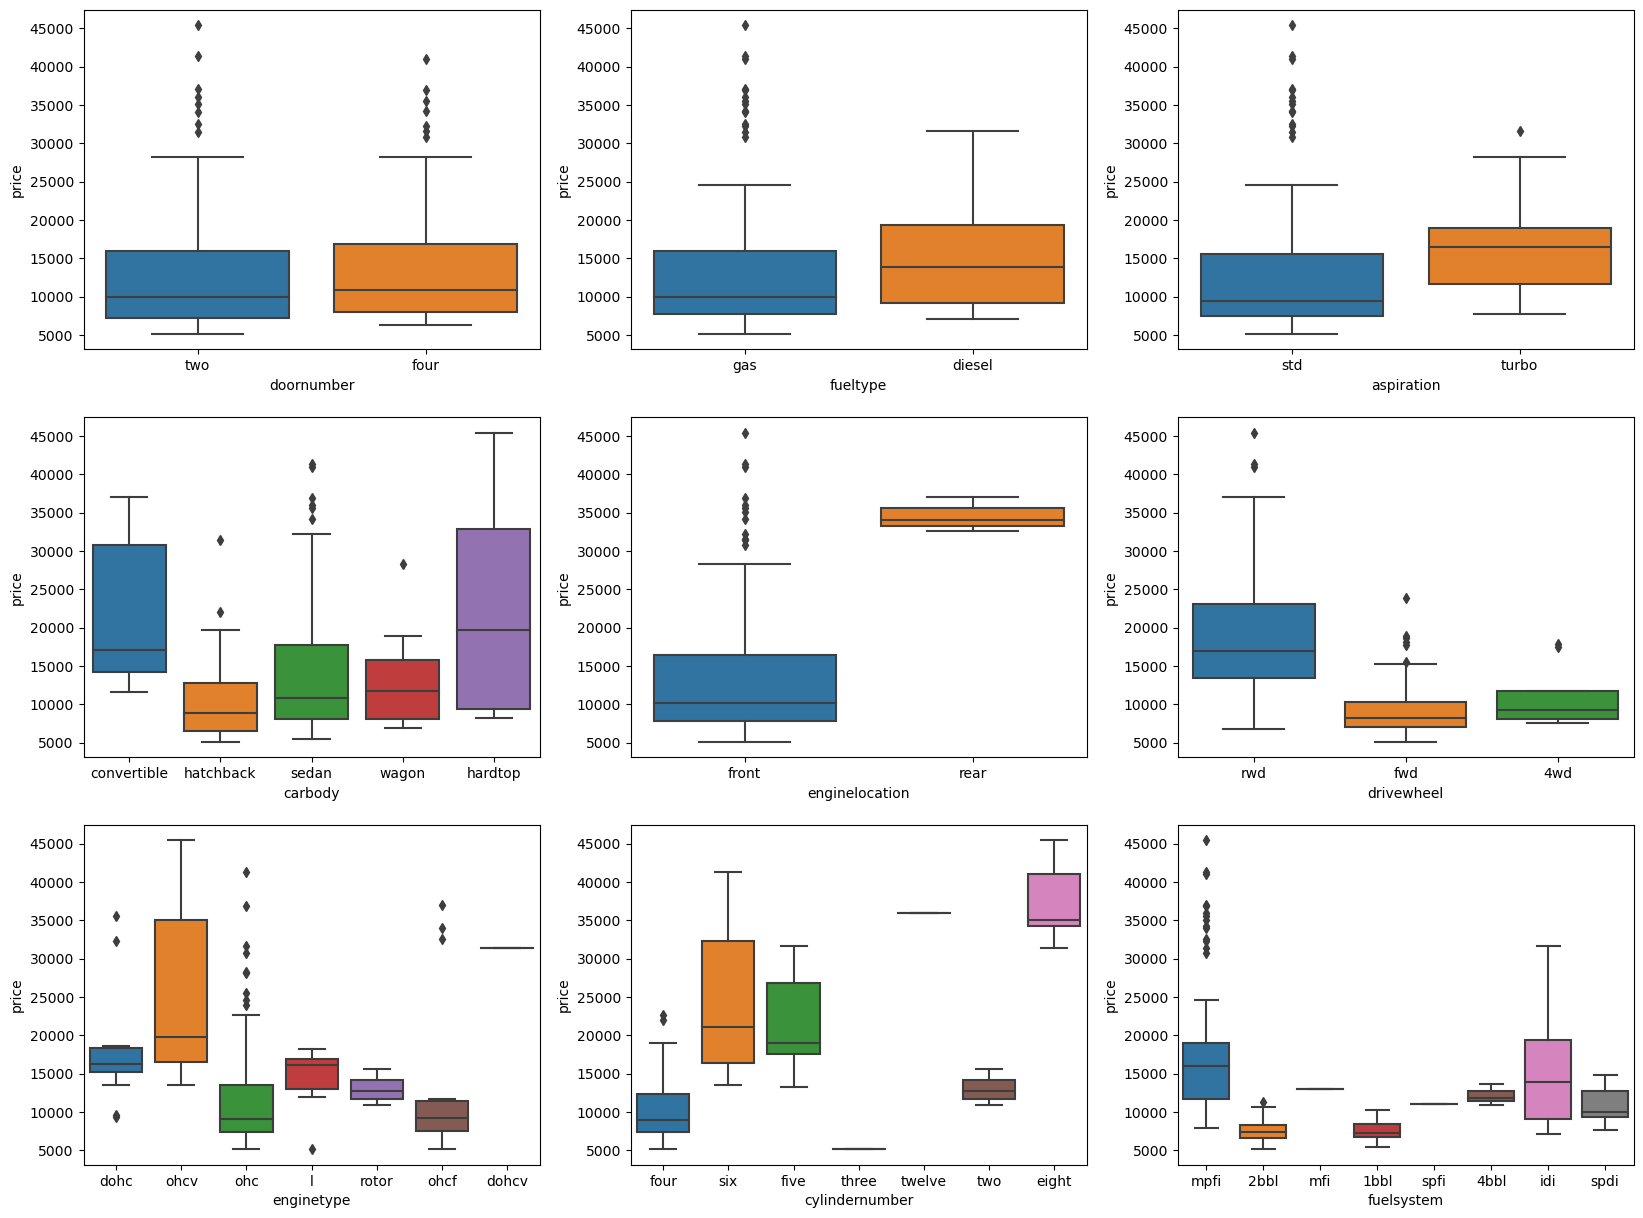

In [20]:
plt.figure(figsize=(20, 15))
plt.subplot(3,3,1)
sns.boxplot(x = 'doornumber', y = 'price', data = car)
plt.subplot(3,3,2)
sns.boxplot(x = 'fueltype', y = 'price', data = car)
plt.subplot(3,3,3)
sns.boxplot(x = 'aspiration', y = 'price', data = car)
plt.subplot(3,3,4)
sns.boxplot(x = 'carbody', y = 'price', data = car)
plt.subplot(3,3,5)
sns.boxplot(x = 'enginelocation', y = 'price', data = car)
plt.subplot(3,3,6)
sns.boxplot(x = 'drivewheel', y = 'price', data = car)
plt.subplot(3,3,7)
sns.boxplot(x = 'enginetype', y = 'price', data = car)
plt.subplot(3,3,8)
sns.boxplot(x = 'cylindernumber', y = 'price', data = car)
plt.subplot(3,3,9)
sns.boxplot(x = 'fuelsystem', y = 'price', data = car)
plt.show()
plt.tight_layout()

* DoorNumber isn't affecting the price much.
* The cars with fueltype as diesel are comparatively expensive than the cars with fueltype as gas.
* Cars with turbo aspiration have high comparitively high price.
* All the types of carbody is relatively cheaper as compared to convertible and hardtop carbody.
* The cars with rear enginelocation are way expensive than cars with front enginelocation.
* HigerEnd cars seems to have rwd drivewheel
* Enginetype ohcv comes into higher price range cars.
* The price of car is directly proportional to no. of cylinders in most cases.
* Cars with mpfi and idi fuelsystems has comparetively high price.


#**5. Data Preprocessing**

**a. Since CompanyName column has 22 differnt companies it would be infeasible to label them and use for further process, so I am adding "Cars category" column to the dataset according to car prices and groupping cars as budget friendly, medium range, expensive cars and dropping column CompanyName.**



In [21]:
car1 = car.copy()
cat_price = car1.groupby('CompanyName')['price'].mean()

car1 = car1.merge(cat_price.reset_index(), how = 'left', on = 'CompanyName')

bins = [0,10000,20000,50000]
label =['Budget_Friendly','Medium_Range','Expensive_Cars']

car['Category'] = pd.cut(car1['price_y'], bins, right=False, labels=label)

In [22]:
car.drop('CompanyName', axis=1,  inplace=True)

In [23]:
car.head()

symboling fueltype aspiration doornumber      carbody drivewheel  \
0          3      gas        std        two  convertible        rwd   
1          3      gas        std        two  convertible        rwd   
2          1      gas        std        two    hatchback        rwd   
3          2      gas        std       four        sedan        fwd   
4          2      gas        std       four        sedan        4wd   

  enginelocation  wheelbase  carlength  carwidth  ...  fuelsystem  boreratio  \
0          front       88.6      168.8      64.1  ...        mpfi       3.47   
1          front       88.6      168.8      64.1  ...        mpfi       3.47   
2          front       94.5      171.2      65.5  ...        mpfi       2.68   
3          front       99.8      176.6      66.2  ...        mpfi       3.19   
4          front       99.4      176.6      66.4  ...        mpfi       3.19   

  stroke compressionratio  horsepower peakrpm  citympg  highwaympg    price  \
0   2.68              9.0         111    5000       21          27  13495.0   
1   2.68              9.0         111    5000       21          27  16500.0   
2   3.47              9.0         154    5000       19          26  16500.0   
3   3.40             10.0         102    5500       24          30  13950.0   
4   3.40              8.0         115    5500       18          22  17450.0   

       Category  
0  Medium_Range  
1  Medium_Range  
2  Medium_Range  
3  Medium_Range  
4  Medium_Range  

[5 rows x 25 columns]

* **From Pairplot, Pearson Correlation and Boxplot we get following Significant features:**

1.   wheelbase
2.   boreratio
3.   carlength
4.   carwidth
5.   enginesize
6.   horsepower
7.   citympg
8.   highwaympg
9.   fueltype
10.  aspiration
11.  carbody
12.  drivewheel
13.  enginetype
14.  cylindernumber
15.  category
16.  curbweight


In [24]:
sig_col = ['price','Category','enginetype','fueltype', 'aspiration','carbody','cylindernumber', 'drivewheel',
            'wheelbase','curbweight', 'enginesize', 'boreratio','horsepower', 
                    'citympg','highwaympg', 'carlength','carwidth']

In [25]:
car = car[sig_col]
car.shape

(205, 17)

* **We get 17 significant columns**

**b. Creating dummy variables for the categorical feature and store it in a new variable - 'dummies' and dropping original categorical columns**

In [26]:
sig_cat_col = ['Category','fueltype','aspiration','carbody','drivewheel','enginetype','cylindernumber']

In [27]:
dummies = pd.get_dummies(car[sig_cat_col], drop_first = True)
dummies.shape

(205, 22)

In [28]:
car= pd.concat([car, dummies], axis = 1)   #Adding the results to the original dataframe

In [29]:
car.drop( sig_cat_col, axis = 1, inplace = True)  #Dropping the original categorical variables as dummies are already created
car.shape

(205, 32)

#**6. Splitting the Data into Training and Testing Sets and scaling the numerical features**

**a. I am dividing the dataset into 70 % trainset and 30 % testset and setting the randomstate so that the train and test data set always have the same rows, respectively.**



In [30]:
car_train, car_test = train_test_split(car, train_size = 0.7, test_size = 0.3, random_state =100 )

**b. It is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. Here I am using Standardisation (mean-0, sigma-1 i.e. shifting the distribution of each attribute to have a mean zero and a standard deviation one)**


In [31]:
scaler = StandardScaler()

In [32]:
sig_num_col = ['wheelbase','carlength','carwidth','curbweight','enginesize','boreratio','horsepower','citympg','highwaympg','price']

In [33]:
car_train[sig_num_col] = scaler.fit_transform(car_train[sig_num_col])  #Applying scaler() to all the columns except the 'dummy' variables 

In [34]:
car_train.head()

price  wheelbase  curbweight  enginesize  boreratio  horsepower  \
122 -0.700201  -0.811836   -0.642128   -0.660242  -1.297329   -0.872898   
125  1.151929  -0.677177    0.439415    0.637806   2.432256    1.021826   
166 -0.452248  -0.677177   -0.441296   -0.660242  -0.259197    0.238673   
1    0.442646  -1.670284    0.015642    0.123485   0.625138    0.213410   
199  0.757569   0.972390    1.137720    0.123485   1.201877    1.501822   

      citympg  highwaympg  carlength  carwidth  ...  enginetype_ohc  \
122  0.839773    1.025419  -0.487238 -0.924500  ...               1   
125 -0.957048   -0.557490  -0.359789  1.114978  ...               1   
166  0.091098   -0.269688  -0.375720 -0.833856  ...               0   
1   -0.657578   -0.557490  -0.367754 -0.788535  ...               0   
199 -1.256518   -1.276993   1.225364  0.616439  ...               1   

     enginetype_ohcf  enginetype_ohcv  enginetype_rotor  cylindernumber_five  \
122                0                0                 0                    0   
125                0                0                 0                    0   
166                0                0                 0                    0   
1                  0                0                 0                    0   
199                0                0                 0                    0   

     cylindernumber_four  cylindernumber_six  cylindernumber_three  \
122                    1                   0                     0   
125                    1                   0                     0   
166                    1                   0                     0   
1                      1                   0                     0   
199                    1                   0                     0   

     cylindernumber_twelve  cylindernumber_two  
122                      0                   0  
125                      0                   0  
166                      0                   0  
1                        0                   0  
199                      0                   0  

[5 rows x 32 columns]

##**7. Checking correlation coefficients to see which variables are highly correlated**

In [35]:
plt.figure(figsize = (25, 25))
sns.heatmap(car_train.corr(), annot=True)
plt.show()

<Figure size 640x480 with 0 Axes>

* **Highly correlated variables with price are - curbweight, enginesize, horsepower,carwidth, highwaympg, citymap.**

####**Scatterplot to check how few variables are correlated with price.**

In [36]:
from matplotlib import gridspec
plt.figure(figsize = (10, 10))
 
#highwaympg
ax=plt.subplot(231)
sns.scatterplot(x='highwaympg',y='price',data=car)
ax.set_title('highwaympg')
 
#citympg
ax=plt.subplot(232)
sns.scatterplot(x='citympg',y='price',data=car)
ax.set_title('citympg')

#horsepower
ax=plt.subplot(233)
sns.scatterplot(x='horsepower',y='price',data=car)
ax.set_title('horsepower')

#enginesize
ax=plt.subplot(234)
sns.scatterplot(x='enginesize',y='price',data=car)
ax.set_title('enginesize')
 
#curbweight
ax=plt.subplot(235)
sns.scatterplot(x='curbweight',y='price',data=car)
ax.set_title('curbweight')

#carwidth
ax=plt.subplot(236)
sns.scatterplot(x='carwidth',y='price',data=car)
ax.set_title('carwidth')

plt.tight_layout()


* **In all the above plots we can fit a line.**

**Dividing into x and y sets for the model building**

In [37]:
x_train=car_train.drop(['price'],axis=1)
y_train=car_train['price']

#**8. Building a Linear Model by manually picking highly correlated variables**

In [38]:
x_train1 = x_train['enginesize']


In [39]:
#Adding a constant
x_train1c = sm.add_constant(x_train1)

#Creating a first fitted model with only one feature
reg1 = sm.OLS(y_train, x_train1c).fit()

In [40]:
#Checking parameters created
reg1.params

const         1.474515e-16
enginesize    8.679148e-01
dtype: float64

 Visualising the data with a scatter plot and the fitted regression line


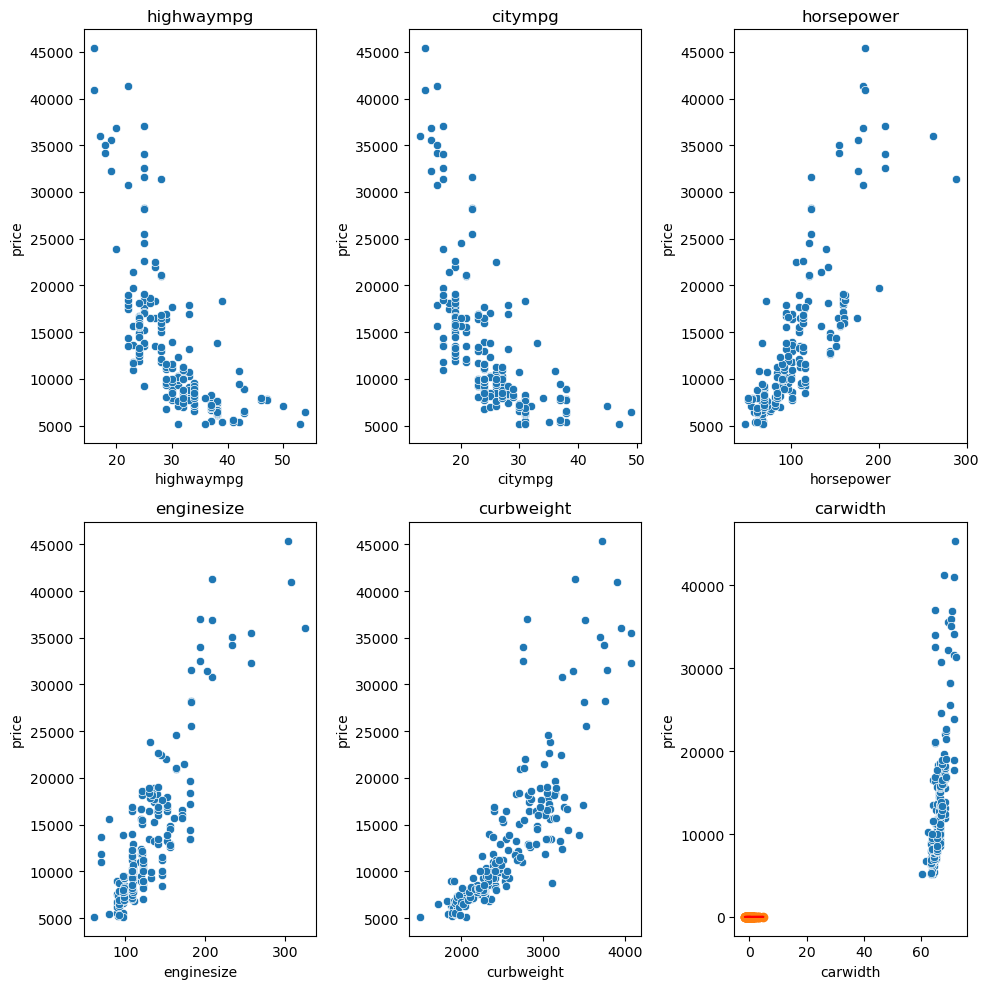

In [41]:
plt.scatter(x_train1c.iloc[:, 1], y_train)
plt.plot(x_train1c.iloc[:, 1], 0.868*x_train1c.iloc[:, 1], 'r')
plt.show()

In [42]:
#Printing summary of the linear regression model obtained
print(reg1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     430.5
Date:                Thu, 25 Nov 2021   Prob (F-statistic):           1.09e-44
Time:                        21:36:11   Log-Likelihood:                -102.85
No. Observations:                 143   AIC:                             209.7
Df Residuals:                     141   BIC:                             215.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.475e-16      0.042   3.52e-15      1.0

The R-squared value obtained is 0.753. Since we have so many variables, we can clearly do better than this. So I am adding other highly correlated variable, i.e. curbweight.

In [43]:
x_train2 = x_train[['enginesize', 'curbweight']]

In [44]:
# Adding a constant
x_train2c = sm.add_constant(x_train2)

# Creating a second fitted model with 2 features
reg2 = sm.OLS(y_train, x_train2c).fit()

In [45]:
reg2.params

const         1.474515e-16
enginesize    4.861641e-01
curbweight    4.412780e-01
dtype: float64

In [46]:
print(reg2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     284.0
Date:                Thu, 25 Nov 2021   Prob (F-statistic):           5.31e-50
Time:                        21:36:11   Log-Likelihood:                -87.018
No. Observations:                 143   AIC:                             180.0
Df Residuals:                     140   BIC:                             188.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.475e-16      0.038   3.92e-15      1.0

The R-squared incresed from 0.753 to 0.802. Adding other highly correlated variable i.e. horsepower

In [47]:
x_train3 = x_train[['enginesize', 'curbweight','horsepower']]

In [48]:
# Adding a constant
x_train3c = sm.add_constant(x_train3)

# Creating a third fitted model with 3 features
reg3 = sm.OLS(y_train, x_train3c).fit()

In [49]:
reg3.params

const         1.457168e-16
enginesize    3.400406e-01
curbweight    3.938176e-01
horsepower    2.288518e-01
dtype: float64

In [50]:
print(reg3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     209.7
Date:                Thu, 25 Nov 2021   Prob (F-statistic):           2.16e-51
Time:                        21:36:11   Log-Likelihood:                -80.681
No. Observations:                 143   AIC:                             169.4
Df Residuals:                     139   BIC:                             181.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.457e-16      0.036   4.04e-15      1.0

* We are getting R-squared value of 0.819 by manually picking the highly correlated variables. 
* Now I will use RFE to select the independent variables which accurately predicts the dependent variable price.

#**9. RFE (Recursive Feature Elimination)**

* Feature ranking with recursive feature elimination.

The goal of recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through any specific attribute or callable. Then, the least important features are pruned from current set of features. That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.

In [51]:
# Running RFE with 15 features to select
lm = LinearRegression()
lm.fit(x_train, y_train)

rfe = RFE(lm, 15)             
rfe = rfe.fit(x_train, y_train)


In [52]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))   #creating list of x train column names, rfe support and rfe ranking.

[('wheelbase', False, 5),
 ('curbweight', True, 1),
 ('enginesize', False, 11),
 ('boreratio', False, 8),
 ('horsepower', True, 1),
 ('citympg', False, 17),
 ('highwaympg', False, 4),
 ('carlength', False, 12),
 ('carwidth', True, 1),
 ('Category_Medium_Range', False, 3),
 ('Category_Expensive_Cars', True, 1),
 ('fueltype_gas', False, 9),
 ('aspiration_turbo', False, 13),
 ('carbody_hardtop', True, 1),
 ('carbody_hatchback', True, 1),
 ('carbody_sedan', True, 1),
 ('carbody_wagon', True, 1),
 ('drivewheel_fwd', False, 6),
 ('drivewheel_rwd', False, 10),
 ('enginetype_dohcv', True, 1),
 ('enginetype_l', False, 15),
 ('enginetype_ohc', True, 1),
 ('enginetype_ohcf', False, 2),
 ('enginetype_ohcv', True, 1),
 ('enginetype_rotor', False, 14),
 ('cylindernumber_five', True, 1),
 ('cylindernumber_four', True, 1),
 ('cylindernumber_six', True, 1),
 ('cylindernumber_three', False, 7),
 ('cylindernumber_twelve', True, 1),
 ('cylindernumber_two', False, 16)]

Selecting the columns which are in support

In [53]:
col_sup = x_train.columns[rfe.support_]
col_sup

Index(['curbweight', 'horsepower', 'carwidth', 'Category_Expensive_Cars',
       'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'enginetype_dohcv', 'enginetype_ohc',
       'enginetype_ohcv', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_twelve'],
      dtype='object')

Creating x_train dataframe with RFE selected variables

In [54]:
 x_train_rfe = x_train[col_sup]

After passing the arbitary selected columns by RFE I am manually evaluating each models p-value and VIF value. Unless I will find the acceptable range for p-values and VIF I will keep dropping the variables one at a time based on below criteria.

* High p-value High VIF : Drop the variable
* High p-value Low VIF or Low p-value High VIF : Drop the variable with high p-value first
* Low p-value Low VIF : accept the variable

In [55]:
# Adding a constant variable and Build a first fitted model
import statsmodels.api as sm  
x_train_rfec = sm.add_constant(x_train_rfe)
lm_rfe = sm.OLS(y_train,x_train_rfec).fit()

#Summary of linear model
print(lm_rfe.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     124.2
Date:                Thu, 25 Nov 2021   Prob (F-statistic):           3.41e-68
Time:                        21:36:12   Log-Likelihood:                -6.1478
No. Observations:                 143   AIC:                             44.30
Df Residuals:                     127   BIC:                             91.70
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

* Looking at the p-values, it looks like some of the variables aren't really significant (in the presence of other variables)
and we need to drop them.

* Checking VIF : 
Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating VIF is:

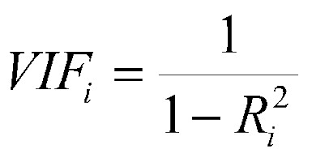

Create a dataframe that will contain the names of all the feature variables and their respective VIFs

In [56]:
 
vif = pd.DataFrame()
vif['Features'] = x_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe.values, i) for i in range(x_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
12      cylindernumber_four  15.92
6             carbody_sedan   9.73
0                curbweight   9.06
2                  carwidth   6.24
5         carbody_hatchback   6.15
9            enginetype_ohc   5.97
1                horsepower   5.61
13       cylindernumber_six   4.73
7             carbody_wagon   3.48
11      cylindernumber_five   2.82
3   Category_Expensive_Cars   2.17
8          enginetype_dohcv   1.84
14    cylindernumber_twelve   1.66
10          enginetype_ohcv   1.63
4           carbody_hardtop   1.45

* We generally want a VIF that is less than 5. So there are clearly some variables we need to drop.

**Dropping the variable and updating the model**

* Dropping cylindernumber_twelve beacuse its p-value is 0.393 and we want p-value less than 0.05 and hence rebuilding the model

**MODEL 1**

In [57]:
# Dropping highly correlated variables and insignificant variables

x_train_rfe1 = x_train_rfe.drop('cylindernumber_twelve', 1,)

# Adding a constant variable and Build a second fitted model

x_train_rfe1c = sm.add_constant(x_train_rfe1)
lm_rfe1 = sm.OLS(y_train, x_train_rfe1c).fit()

#Summary of linear model
print(lm_rfe1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     133.3
Date:                Thu, 25 Nov 2021   Prob (F-statistic):           4.16e-69
Time:                        21:36:12   Log-Likelihood:                -6.5605
No. Observations:                 143   AIC:                             43.12
Df Residuals:                     128   BIC:                             87.56
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [58]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = x_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe1.values, i) for i in range(x_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
12      cylindernumber_four  15.27
0                curbweight   9.06
6             carbody_sedan   9.05
2                  carwidth   6.15
5         carbody_hatchback   5.95
9            enginetype_ohc   5.92
1                horsepower   4.69
13       cylindernumber_six   3.70
7             carbody_wagon   3.31
11      cylindernumber_five   2.66
3   Category_Expensive_Cars   2.14
8          enginetype_dohcv   1.67
10          enginetype_ohcv   1.53
4           carbody_hardtop   1.45

* Dropping cylindernumber_six beacuse its p-value is 0.493 and we want p-value less than 0.05 and hence rebuilding the model

**MODEL 2**

In [59]:
# Dropping highly correlated variables and insignificant variables

x_train_rfe2 = x_train_rfe1.drop('cylindernumber_six', 1,)

# Adding a constant variable and Build a third fitted model

x_train_rfe2c = sm.add_constant(x_train_rfe2)
lm_rfe2 = sm.OLS(y_train, x_train_rfe2c).fit()

#Summary of linear model
print(lm_rfe2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     144.1
Date:                Thu, 25 Nov 2021   Prob (F-statistic):           4.29e-70
Time:                        21:36:12   Log-Likelihood:                -6.8235
No. Observations:                 143   AIC:                             41.65
Df Residuals:                     129   BIC:                             83.13
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [60]:
vif = pd.DataFrame()
vif['Features'] = x_train_rfe2.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe2.values, i) for i in range(x_train_rfe2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
12      cylindernumber_four  8.99
0                curbweight  8.53
2                  carwidth  5.72
9            enginetype_ohc  5.65
6             carbody_sedan  5.24
1                horsepower  4.53
5         carbody_hatchback  3.76
7             carbody_wagon  2.36
3   Category_Expensive_Cars  2.13
11      cylindernumber_five  1.97
8          enginetype_dohcv  1.60
10          enginetype_ohcv  1.52
4           carbody_hardtop  1.28

* Dropping carbody_hardtop beacuse its p-value is 0.238 and we want p-value less than 0.05 and hence rebuilding the model

**MODEL 3**

In [61]:
# Dropping highly correlated variables and insignificant variables

x_train_rfe3 = x_train_rfe2.drop('carbody_hardtop', 1,)

# Adding a constant variable and Build a fourth fitted model
x_train_rfe3c = sm.add_constant(x_train_rfe3)
lm_rfe3 = sm.OLS(y_train, x_train_rfe3c).fit()

#Summary of linear model
print(lm_rfe3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     155.5
Date:                Thu, 25 Nov 2021   Prob (F-statistic):           6.73e-71
Time:                        21:36:12   Log-Likelihood:                -7.5984
No. Observations:                 143   AIC:                             41.20
Df Residuals:                     130   BIC:                             79.71
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [62]:

vif = pd.DataFrame()
vif['Features'] = x_train_rfe3.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe3.values, i) for i in range(x_train_rfe3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0                curbweight  8.51
11      cylindernumber_four  8.09
2                  carwidth  5.65
8            enginetype_ohc  5.60
5             carbody_sedan  4.64
1                horsepower  4.17
4         carbody_hatchback  3.31
6             carbody_wagon  2.22
3   Category_Expensive_Cars  2.08
10      cylindernumber_five  1.93
7          enginetype_dohcv  1.58
9           enginetype_ohcv  1.52

* Dropping enginetype_ohc beacuse its p-value is 0.110 and we want p-value less than 0.05 and hence rebuilding the model

**MODEL 4**

In [63]:
# Dropping highly correlated variables and insignificant variables

x_train_rfe4 = x_train_rfe3.drop('enginetype_ohc', 1,)

# Adding a constant variable and Build a fifth fitted model
x_train_rfe4c = sm.add_constant(x_train_rfe4)
lm_rfe4 = sm.OLS(y_train, x_train_rfe4c).fit()

#Summary of linear model
print(lm_rfe4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     167.4
Date:                Thu, 25 Nov 2021   Prob (F-statistic):           1.81e-71
Time:                        21:36:12   Log-Likelihood:                -9.0054
No. Observations:                 143   AIC:                             42.01
Df Residuals:                     131   BIC:                             77.57
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [64]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = x_train_rfe4.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe4.values, i) for i in range(x_train_rfe4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0                curbweight  8.25
10      cylindernumber_four  6.80
2                  carwidth  5.65
5             carbody_sedan  4.33
1                horsepower  4.17
4         carbody_hatchback  3.10
6             carbody_wagon  2.20
3   Category_Expensive_Cars  1.83
9       cylindernumber_five  1.63
7          enginetype_dohcv  1.57
8           enginetype_ohcv  1.51

* Dropping cylindernumber_five beacuse its p-value is 0.104 and we want p-value less than 0.05 and hence rebuilding the model

**MODEL 5**

In [65]:
# Dropping highly correlated variables and insignificant variables

x_train_rfe5 = x_train_rfe4.drop('cylindernumber_five', 1,)

# Adding a constant variable and Build a sixth fitted model
x_train_rfe5c = sm.add_constant(x_train_rfe5)
lm_rfe5 = sm.OLS(y_train, x_train_rfe5c).fit()

#Summary of linear model
print(lm_rfe5.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     181.6
Date:                Thu, 25 Nov 2021   Prob (F-statistic):           4.91e-72
Time:                        21:36:12   Log-Likelihood:                -10.457
No. Observations:                 143   AIC:                             42.91
Df Residuals:                     132   BIC:                             75.51
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [66]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = x_train_rfe5.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe5.values, i) for i in range(x_train_rfe5.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0               curbweight  8.10
9      cylindernumber_four  5.76
2                 carwidth  5.08
1               horsepower  4.13
5            carbody_sedan  3.52
4        carbody_hatchback  2.63
6            carbody_wagon  1.94
3  Category_Expensive_Cars  1.83
7         enginetype_dohcv  1.54
8          enginetype_ohcv  1.43

* Dropping enginetype_ohcv beacuse its p-value is 0.180 and we want p-value less than 0.05 and hence rebuilding the model

**MODEL 6**

In [67]:
x_train_rfe6 = x_train_rfe5.drop('enginetype_ohcv', 1,)

# Adding a constant variable and Build a sixth fitted model
x_train_rfe6c = sm.add_constant(x_train_rfe6)
lm_rfe6 = sm.OLS(y_train, x_train_rfe6c).fit()

#Summary of linear model
print(lm_rfe6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     200.3
Date:                Thu, 25 Nov 2021   Prob (F-statistic):           8.26e-73
Time:                        21:36:12   Log-Likelihood:                -11.434
No. Observations:                 143   AIC:                             42.87
Df Residuals:                     133   BIC:                             72.50
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [68]:

vif = pd.DataFrame()
vif['Features'] = x_train_rfe6.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe6.values, i) for i in range(x_train_rfe6.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0               curbweight  8.10
8      cylindernumber_four  5.66
2                 carwidth  5.08
1               horsepower  3.81
5            carbody_sedan  3.35
4        carbody_hatchback  2.47
6            carbody_wagon  1.89
3  Category_Expensive_Cars  1.81
7         enginetype_dohcv  1.49

* Dropping curbweight beacuse its VIF is 8.1 and we want VIF less than 5 and hence rebuilding the model

**MODEL 7**

In [69]:
x_train_rfe7 = x_train_rfe6.drop('curbweight', 1,)

# Adding a constant variable and Build a sixth fitted model
x_train_rfe7c = sm.add_constant(x_train_rfe7)
lm_rfe7 = sm.OLS(y_train, x_train_rfe7c).fit()

#Summary of linear model
print(lm_rfe7.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     203.4
Date:                Thu, 25 Nov 2021   Prob (F-statistic):           4.86e-71
Time:                        21:36:12   Log-Likelihood:                -18.737
No. Observations:                 143   AIC:                             55.47
Df Residuals:                     134   BIC:                             82.14
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [70]:
vif = pd.DataFrame()
vif['Features'] = x_train_rfe7.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe7.values, i) for i in range(x_train_rfe7.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
7      cylindernumber_four  5.66
4            carbody_sedan  3.35
0               horsepower  2.72
3        carbody_hatchback  2.40
1                 carwidth  2.22
2  Category_Expensive_Cars  1.73
5            carbody_wagon  1.71
6         enginetype_dohcv  1.24

* Dropping cylindernumber_four beacuse its VIF is 5.66 and we want VIF less than 5 and hence rebuilding the model

**MODEL 8**

In [71]:
x_train_rfe8 = x_train_rfe7.drop('cylindernumber_four', 1,)

# Adding a constant variable and Build a sixth fitted model
x_train_rfe8c = sm.add_constant(x_train_rfe8)
lm_rfe8 = sm.OLS(y_train, x_train_rfe8c).fit()

#Summary of linear model
print(lm_rfe8.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     215.9
Date:                Thu, 25 Nov 2021   Prob (F-statistic):           4.70e-70
Time:                        21:36:12   Log-Likelihood:                -24.089
No. Observations:                 143   AIC:                             64.18
Df Residuals:                     135   BIC:                             87.88
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [72]:
vif = pd.DataFrame()
vif['Features'] = x_train_rfe8.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe8.values, i) for i in range(x_train_rfe8.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0               horsepower  2.45
1                 carwidth  2.12
2  Category_Expensive_Cars  1.70
4            carbody_sedan  1.22
6         enginetype_dohcv  1.22
3        carbody_hatchback  1.10
5            carbody_wagon  1.02

* Now I am dropping carbody_sedan with p value 0.004 and see if there is any drastic fall in R squared.If not we can drop carbody sedan.



**MODEL 9**

In [73]:
x_train_rfe9 = x_train_rfe8.drop('carbody_sedan', 1,)

# Adding a constant variable and Build a sixth fitted model
x_train_rfe9c = sm.add_constant(x_train_rfe9)
lm_rfe9 = sm.OLS(y_train, x_train_rfe9c).fit()

#Summary of linear model
print(lm_rfe9.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     237.6
Date:                Thu, 25 Nov 2021   Prob (F-statistic):           1.68e-69
Time:                        21:36:12   Log-Likelihood:                -28.398
No. Observations:                 143   AIC:                             70.80
Df Residuals:                     136   BIC:                             91.54
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

* The R squared value just dropped by 0.005. Hence we can proceed with dropping carbody_sedan.

In [74]:
vif = pd.DataFrame()
vif['Features'] = x_train_rfe9.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe9.values, i) for i in range(x_train_rfe9.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0               horsepower  2.31
1                 carwidth  2.08
2  Category_Expensive_Cars  1.46
5         enginetype_dohcv  1.22
3        carbody_hatchback  1.10
4            carbody_wagon  1.02

* Dropping carbody_wagon beacuse its p-value is 0.315 and we want p-value less than 0.05 and hence rebuilding the model

**MODEL 10**

In [75]:
x_train_rfe10 = x_train_rfe9.drop('carbody_wagon', 1,)

# Adding a constant variable and Build a sixth fitted model
x_train_rfe10c = sm.add_constant(x_train_rfe10)
lm_rfe10 = sm.OLS(y_train, x_train_rfe10c).fit()

#Summary of linear model
print(lm_rfe10.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     284.8
Date:                Thu, 25 Nov 2021   Prob (F-statistic):           1.57e-70
Time:                        21:36:12   Log-Likelihood:                -28.931
No. Observations:                 143   AIC:                             69.86
Df Residuals:                     137   BIC:                             87.64
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [76]:
vif = pd.DataFrame()
vif['Features'] = x_train_rfe10.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe10.values, i) for i in range(x_train_rfe10.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0               horsepower  2.28
1                 carwidth  2.07
2  Category_Expensive_Cars  1.45
4         enginetype_dohcv  1.22
3        carbody_hatchback  1.10

* Now the VIFs and p-values both are within an acceptable range for **MODEL 10**  and  **MODEL 8** So we can make our predictions using these models

#**10. Prediction Using Model 10** (5 predictor variable)

In [77]:
car_test[sig_num_col] = scaler.transform(car_test[sig_num_col])
car_test.shape

(62, 32)

In [78]:
y_test = car_test.pop('price')
x_test = car_test

In [79]:
x_test_1 = sm.add_constant(x_test)

x_test_new = x_test_1[x_train_rfe10c.columns]

In [80]:
y_pred = lm_rfe10.predict(x_test_new)

#**11. Checking if model 10 meets the assumptions of regression**

##**a. Residual Analysis (Errors should follow normal distribution)**

In [81]:
fig = plt.figure()
sns.distplot((y_test - y_pred), bins = 20)
fig.suptitle('Residual Analysis', fontsize = 20)                   
plt.xlabel('Errors', fontsize = 18)

Text(0.5, 0, 'Errors')

* **Here we can clearly see that errors are following normal distribution**

##**b. Autocorrelation**

In [82]:
from statsmodels.stats.stattools import durbin_watson
residuals= y_test - y_pred
durbinwatson=durbin_watson(residuals)

In [83]:
durbinwatson

1.7883175959479758

* **Since the value is close to 2 there is no autocorrelation**

##**c. Homoscedacity** (Constant variance)

In [84]:
p=sns.scatterplot(y_pred,residuals)
plt.xlabel('y_pred')
plt.ylabel('Residuals')
p=sns.lineplot([-1,4],[0,0],color='blue')

#**12. Model 10 Evaluation**

In [85]:
import sklearn
mse=sklearn.metrics.mean_squared_error(y_test,y_pred)

In [86]:
import math
rmse=math.sqrt(mse)
rmse

0.323710072034006

In [87]:
r2_score(y_test, y_pred)

0.9094353587467604

The R2 score of Training set is 0.912 and Test set is 0.909 which is quite close. Hence, We can say that our model is good enough to predict the Car prices using below predictor variables

* horsepower
* carwidth
* Category_Expensive_Cars
* enginetype_dohcv
* carbody_hatchback


Equation of Line to predict the Car prices values:

Carprice= −0.0925 + 0.3847×horsepower + 0.3381×carwidth + 1.3179×CategoryExpensiveCars − 0.1565×carbodyhatchback − 1.5033×enginetypedohcv

#**13. Prediction Using Model 8** (7 predictor variable)


In [88]:
x_test_2 = x_test_1[x_train_rfe8c.columns]

In [89]:
y_pred2 = lm_rfe8.predict(x_test_2)

#**14. Checking if model 8 meets the assumptions of regression**


##**a. Residual Analysis (Errors should follow normal distribution)**


In [90]:
fig = plt.figure()
sns.distplot((y_test - y_pred2), bins = 20)
fig.suptitle('Residual Analysis', fontsize = 20)                   
plt.xlabel('Errors', fontsize = 18)

Text(0.5, 0, 'Errors')

* **Here we can clearly see that errors are following normal distribution**

##**b. Autocorrelation**

In [91]:
from statsmodels.stats.stattools import durbin_watson
residuals2= y_test - y_pred2
durbinwatson=durbin_watson(residuals2)

In [92]:
durbinwatson

1.699029510965215

* **Since the value is close to 2 there is no autocorrelation**

##**c. Homoscedacity**

In [93]:
p=sns.scatterplot(y_pred2,residuals2)
plt.xlabel('y_pred2')
plt.ylabel('Residuals2')
p=sns.lineplot([-1,4],[0,0],color='blue')

#**15. Model 8 Evaluation**

In [94]:
mse2=sklearn.metrics.mean_squared_error(y_test,y_pred2)

In [95]:
rmse2=math.sqrt(mse2)
rmse2

0.3128958574326825

In [96]:
r2_score(y_test, y_pred2)

0.9153852894725918

The R2 score of Training set is 0.918 and Test set is 0.915 which is quite close. Hence, We can say that our model is good enough to predict the Car prices using below predictor variables

* horsepower
* carwidth
* Category_Expensive_Cars
* carbody_hatchback
* enginetype_dohcv
* carbody_sedan
* carbody_wagon

Equation of Line to predict the Car prices values


Carprice = 0.2440 + 0.3599×horsepower + 0.3652×carwidth + 1.2895×CategoryExpensiveCars − 0.4859×carbodyhatchback − 0.3518×carbodysedan − 0.4023×carbodywagon -1.4450×enginetypedohcv 

#**16. Comparison of both the models**

**Model 10**

*   R-squared and Adjusted R-squared - 0.912 and 0.909 - 90% variance explained.
*   RMSE : 0.323710



**Model 8**

*   R-sqaured and Adjusted R-squared - 0.918 and 0.914 - 90% variance explained.
*   RMSE : 0.312895



#**Conclusion**

Both the models are good enough to predict the carprices which explains the variance of data upto 90% and the models are significant.